# Python 與機器學習（6）

## 郭耀仁

## 分類問題

- 感知器學習
- from sklearn.linear_model import Perceptron

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, classifier, resolution = 0.02):
    markers = ('o', 'x', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

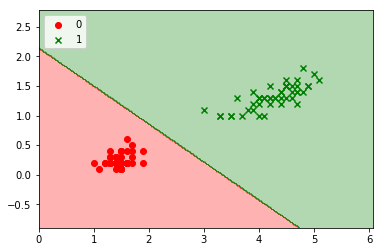

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:100, 2:]
y = iris.target[:100]
ppn = Perceptron(eta0 = 0.01, n_iter = 40)
ppn.fit(X, y)
plot_decision_boundary(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.show()

## 分類問題（2）

- 我們自己寫的感知器只能夠進行二元分類
- `iris` 資料的類別有三類
- `Scikit-learn` 的感知器可以支援多元分類，利用 **One-vs.-all** 方法

In [3]:
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
ppn = Perceptron(n_iter = 40, eta0 = 0.1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print(y_test) # 答案
print(y_pred) # 預測
print(y_test == y_pred) # 對答案

[0 1 1 0 0 2 1 2 1 0 0 0 2 0 1 0 1 2 2 0 2 1 0 2 2 0 0 0 2 0 2 0 1 0 1 2 1
 0 2 2 2 2 0 0 1]
[0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 2 2 0 2 0 0 2 2 0 0 0 2 0 2 0 0 0 0 2 0
 0 0 2 2 2 0 0 0]
[ True False False  True  True  True False  True False  True  True  True
  True  True False  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True False  True
 False  True False  True  True  True  True  True False]


## 分類問題（3）

- `Scikit-learn` 準備了模型評估類別 `metrics`
- 我們可以使用它的準確率方法計算準確率

In [4]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.73


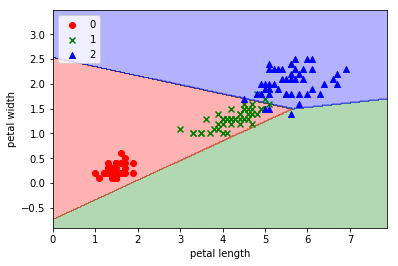

In [5]:
plot_decision_boundary(X = X, y = y, classifier = ppn)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## 分類問題

- 羅吉斯迴歸
- `from sklearn.linear_model import LogisticRegression`

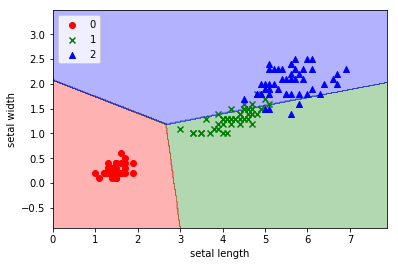

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
plot_decision_boundary(X = X, y = y, classifier = lr) # 切換分類器
plt.xlabel('setal length')
plt.ylabel('setal width')
plt.legend(loc='upper left')
plt.show()

In [7]:
np.set_printoptions(precision = 4, suppress = True) # 調整一下印出格式
# 印出前五個測試資料觀測值的預測機率與分類結果
for i in range(5):
    print(lr.predict_proba(X_test[i, :].reshape(1, 2)))
    print(lr.predict(X_test[i, :].reshape(1, 2)))
    print("===")

np.set_printoptions() # 恢復印出格式預設值

[[ 0.701   0.2677  0.0313]]
[0]
===
[[ 0.0931  0.5484  0.3585]]
[1]
===
[[ 0.0304  0.5367  0.4329]]
[1]
===
[[ 0.723   0.2462  0.0308]]
[0]
===
[[ 0.701   0.2677  0.0313]]
[0]
===


In [8]:
y_pred = lr.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96
